<a href="https://colab.research.google.com/github/Kaviya-U-C/ChurnAnalysis/blob/main/Telco_Churn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Overview**

### **Data Dictionary**

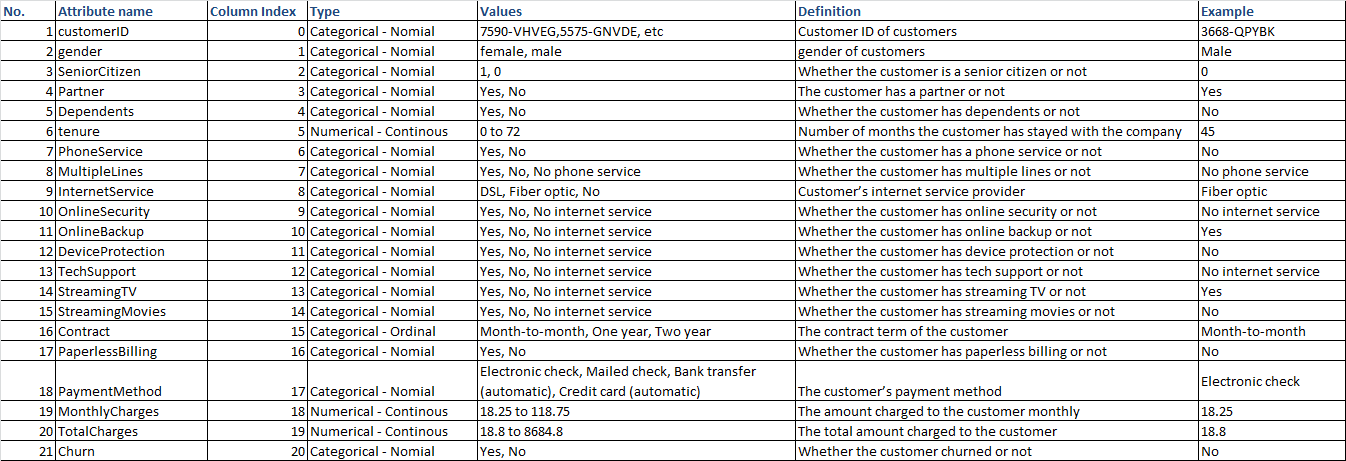

### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To ignore filter warnings
import warnings           
warnings.filterwarnings("ignore")

Importing Files to Colab

In [ ]:
#importing the file to google folder
from google.colab import files 
  
  
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import io
telco = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))

### **Data Quality Check**

In [ ]:
telco.shape

(7043, 21)

In [ ]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#If errors=‘coerce’, then invalid parsing will be set as NaN.
telco.TotalCharges = pd.to_numeric(telco.TotalCharges,errors='coerce')

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
telco.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3804,9773-PEQBZ,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,79.85,797.25,No
6562,3621-CEOVK,Female,1,Yes,No,14,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.20,1369.80,Yes
1956,0019-EFAEP,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),101.30,7261.25,No
3192,1231-YNDEK,Male,0,No,No,58,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.15,1035.50,No
627,6797-UCJHZ,Female,1,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,No,Credit card (automatic),104.60,6819.45,No


In [ ]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
telco.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,5404-GGUKR,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
telco.isnull().sum().sum()

11

In [ ]:
#When compared to 7043 records in dataset,records with missing values are very small less that 0.2%
#Hence we will drop the records with missing values.
np.round((11/7043)*100,2)

0.16

In [ ]:
telco1= telco.copy()
telco1=telco1.dropna(how='any')

In [ ]:
telco1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Splitting into Numerical and Categorical variables

Converting Churn column values from 'Yes or No' to '0 or 1'

In [ ]:
telco1['Churn'].replace(to_replace='Yes',value=1,inplace=True)
telco1['Churn'].replace(to_replace='No',value=0,inplace=True)
telco1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
telco_num= telco1[['Churn','tenure','MonthlyCharges','TotalCharges']]

In [ ]:
telco_num

,Churn,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,1,2,53.85,108.15
3,0,45,42.30,1840.75
4,1,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [ ]:
telco_cat=telco1[['Churn','customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]

In [ ]:
#customerID has unique value for each of the 7032 records and visualizing for univariate and Bivariate will not make any sense
telco_cat = telco_cat.drop(columns='customerID', axis =1)

In [ ]:
telco_cat

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,0,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,1,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,0,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,1,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,0,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,1,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


### Univariate Analysis

#### Target variable

In [ ]:
#Attrition proportion - using Doughnut chart
Y_count = len(telco1[telco1['Churn'] == 1])
N_count = len(telco1[telco1['Churn'] == 0])

In [ ]:
# create data
names='Yes', 'No',
size=[Y_count,N_count]

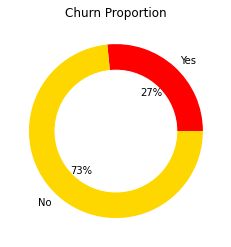

In [ ]:
# Create a circle for the center of the plot
circle = plt.Circle( (0,0), 0.7, color='white')   
plt.pie(size, labels=names, colors=['Red','Gold'],autopct='%1.0f%%')  
p=plt.gcf()
p.gca().add_artist(circle)
ax = plt.axes()
ax.set_title("Churn Proportion")
plt.show() 

Insight: Insight: It is an Imbalanced dataset. Class distribution is not equal or close to equal, and is instead biased or skewed.

#### Numerical Features

In [ ]:
telco_num

,Churn,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,1,2,53.85,108.15
3,0,45,42.30,1840.75
4,1,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


Graphs for Churn:
Minmum value of Churn is :0
Maximum value of Churnis:1




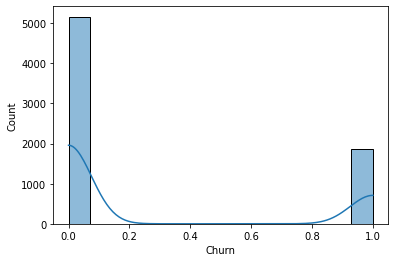

Graphs for tenure:
Minmum value of tenure is :1
Maximum value of tenureis:72




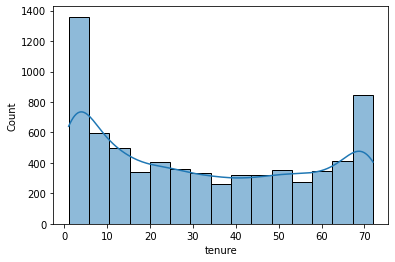

Graphs for MonthlyCharges:
Minmum value of MonthlyCharges is :18
Maximum value of MonthlyChargesis:118




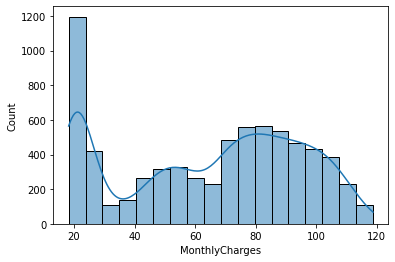

Graphs for TotalCharges:
Minmum value of TotalCharges is :18
Maximum value of TotalChargesis:8684




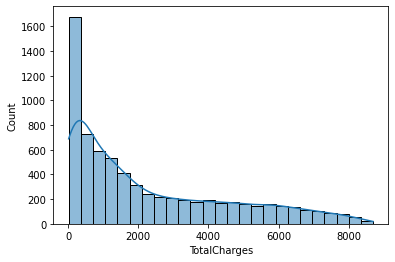

In [ ]:
#histogram with kde for analysing teh distribution of the data
for i in telco_num:
  min = telco_num[i].min()
  max = telco_num[i].max()
  print("Graphs for %s:\nMinmum value of %s is :%d\nMaximum value of %sis:%d\n\n" %(i,i,min,i,max))
  sns.histplot(telco_num, x=i, kde=True)
  plt.show()

#### Categorical Features

In [ ]:
telco_cat

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,0,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,1,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,0,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,1,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,0,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,0,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,1,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check




Graphs for Churn:
Total_no. of categories:2


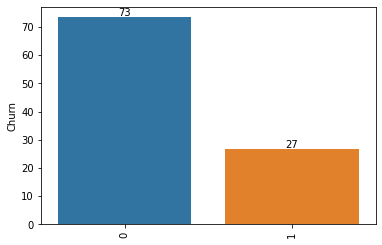



Graphs for gender:
Total_no. of categories:2


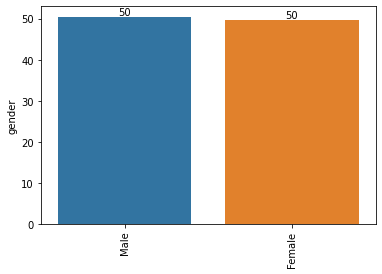



Graphs for SeniorCitizen:
Total_no. of categories:2


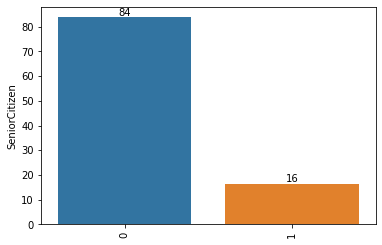



Graphs for Partner:
Total_no. of categories:2


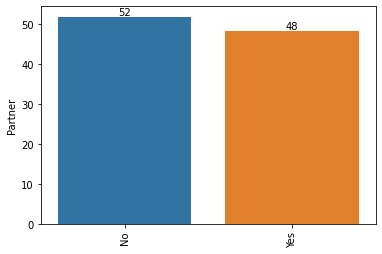



Graphs for Dependents:
Total_no. of categories:2


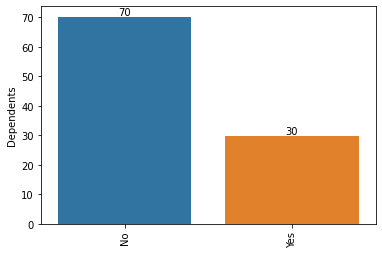



Graphs for PhoneService:
Total_no. of categories:2


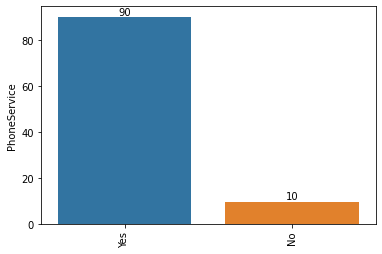



Graphs for MultipleLines:
Total_no. of categories:3


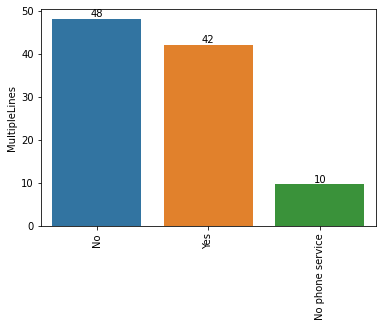



Graphs for InternetService:
Total_no. of categories:3


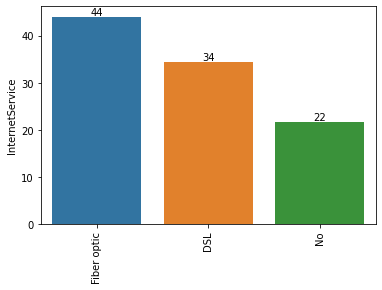



Graphs for OnlineSecurity:
Total_no. of categories:3


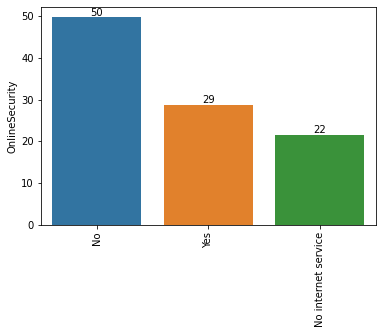



Graphs for OnlineBackup:
Total_no. of categories:3


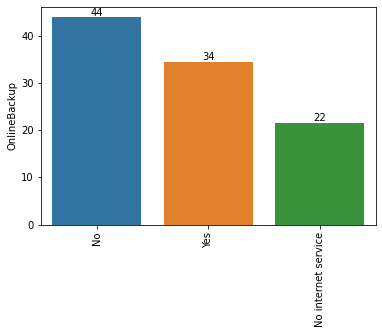



Graphs for DeviceProtection:
Total_no. of categories:3


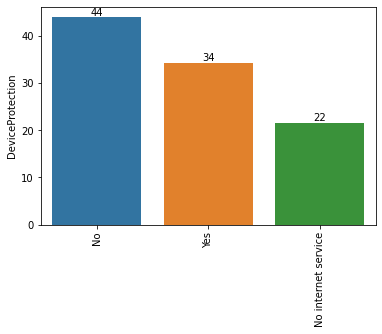



Graphs for TechSupport:
Total_no. of categories:3


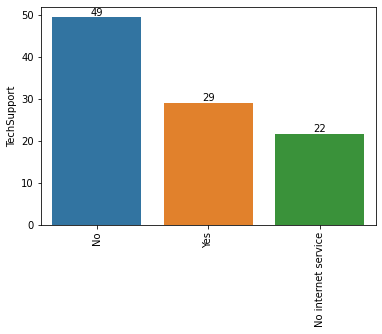



Graphs for StreamingTV:
Total_no. of categories:3


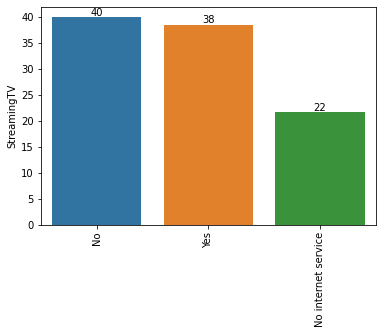



Graphs for StreamingMovies:
Total_no. of categories:3


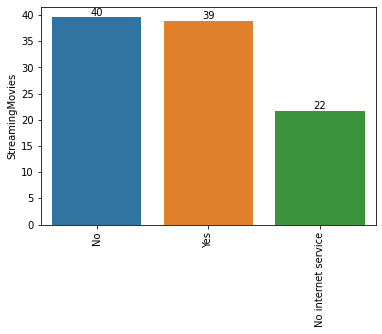



Graphs for Contract:
Total_no. of categories:3


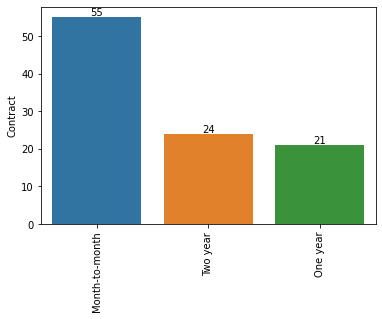



Graphs for PaperlessBilling:
Total_no. of categories:2


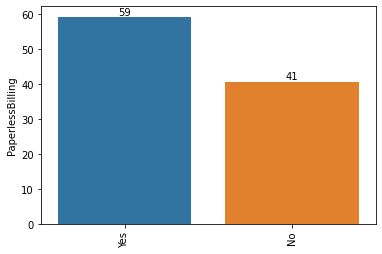



Graphs for PaymentMethod:
Total_no. of categories:4


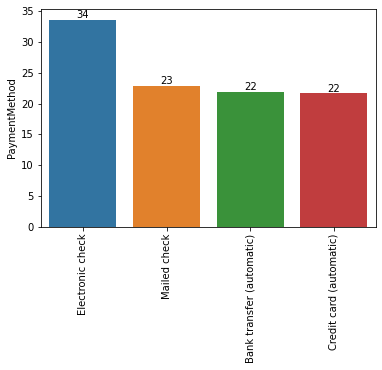

In [ ]:
#barplot: One axis is the category axis indicating the category, 
#while the second axis is the value axis that shows the numeric value of that category, indicated by the length of the bar.

for i in telco_cat:   
    cat_num = telco_cat[i].value_counts()*100/len(telco_cat)
    print("\n\nGraphs for %s:\nTotal_no. of categories:%d" %(i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y= cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)   #rotating labels for better readability
    for bar in chart.patches:  #adding annotation to the graphs
      chart.annotate(format(bar.get_height(), '.0f'), 
      (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
       ha = 'center', va = 'center', 
       xytext = (0, 5), 
       textcoords = 'offset points')
      
    plt.show()

### Bivariate Analysis

#### Correlation and Heatmap : Numerical vs Cat(Churn)

In [ ]:
#correlation matrix - numerical data
correlation_matrix = telco_num.corr()
correlation_matrix.to_csv("Correlation_mat-Churn.csv")
correlation_matrix

,Churn,tenure,MonthlyCharges,TotalCharges
Churn,1.000000,-0.354049,0.192858,-0.199484
tenure,-0.354049,1.000000,0.246862,0.825880
MonthlyCharges,0.192858,0.246862,1.000000,0.651065
TotalCharges,-0.199484,0.825880,0.651065,1.000000


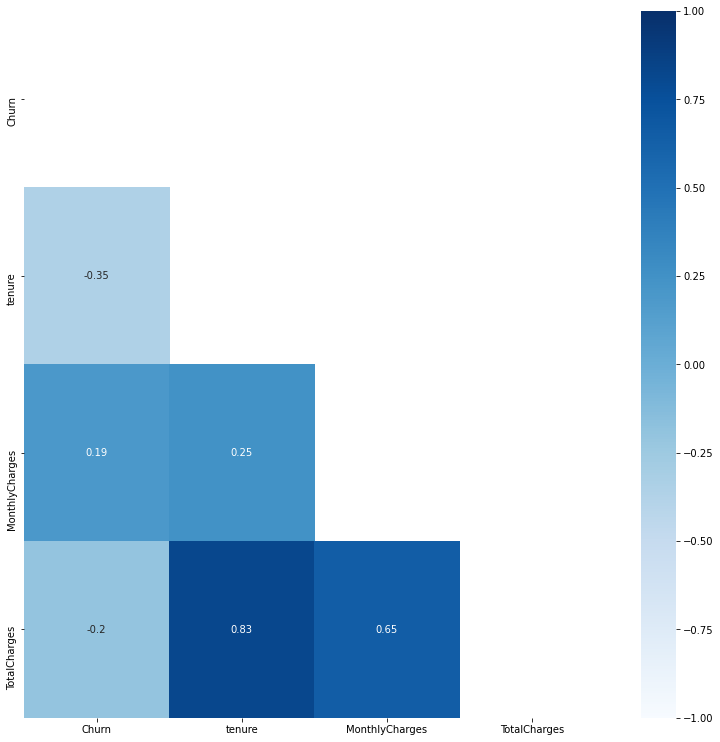

In [ ]:
plt.figure(figsize=(13,13))
matrix = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix,annot=True,mask = matrix,cmap="Blues", vmin=-1,vmax=1,center=0)

Insights:

1. Churn and Tenure are negatively correlated, so lesser months they stay more is the churn rate

2. Though Monthly charge is positively correlated, Total charges is negatively correlated with churn

#### Categorical Associations

In [ ]:
#changing all catg to num(dummy encoding)
telco_cat_encoded = pd.get_dummies(telco_cat)
telco_cat_encoded

,Churn,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
#categorical association -csv
cat_association = telco_cat_encoded.corr()
cat_association.to_csv("Categorical_associations-Churn.csv")
cat_association

,Churn,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn,1.000000,0.150541,0.008545,-0.008545,0.149982,-0.149982,0.163128,-0.163128,-0.011691,0.011691,-0.032654,-0.011691,0.040033,-0.124141,0.307463,-0.227578,0.342235,-0.227578,-0.171270,0.267595,-0.227578,-0.082307,0.252056,-0.227578,-0.066193,0.336877,-0.227578,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
SeniorCitizen,0.150541,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,-0.008392,0.142996,-0.108276,0.254923,-0.182519,0.185145,-0.182519,-0.038576,0.087539,-0.182519,0.066663,0.094403,-0.182519,0.059514,0.205254,-0.182519,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
gender_Female,0.008545,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,-0.007515,0.008883,-0.007584,0.011189,-0.004745,-0.010859,-0.004745,0.016328,-0.008605,-0.004745,0.013093,0.003163,-0.004745,0.000807,-0.003815,-0.004745,0.008507,-0.003088,-0.004745,0.007124,-0.006078,-0.004745,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,-0.008545,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,0.007515,-0.008883,0.007584,-0.011189,0.004745,0.010859,0.004745,-0.016328,0.008605,0.004745,-0.013093,-0.003163,0.004745,-0.000807,0.003815,0.004745,-0.008507,0.003088,0.004745,-0.007124,0.006078,0.004745,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Partner_No,0.149982,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,0.018397,-0.142561,0.001043,-0.001235,0.000286,0.129394,0.000286,-0.143346,0.135626,0.000286,-0.141849,0.146702,0.000286,-0.153556,0.108875,0.000286,-0.120206,0.123394,0.000286,-0.124483,0.117488,0.000286,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,-0.149982,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,-0.018397,0.142561,-0.001043,0.001235,-0.000286,-0.129394,-0.000286,0.143346,-0.135626,-0.000286,0.141849,-0.146702,-0.000286,0.153556,-0.108875,-0.000286,0.120206,-0.123394,-0.000286,0.124483,-0.117488,-0.000286,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948
Dependents_No,0.163128,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,-0.001078,0.024307,-0.051593,0.164101,-0.138383,0.186979,-0.138383,-0.080786,0.137421,-0.138383,-0.023639,0.128053,-0.138383,-0.013900,0.171164,-0.138383,-0.063053,0.099912,-0.138383,0.016499,0.078245,-0.138383,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448
Dependents_Yes,-0.163128,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,0.001078,-0.0

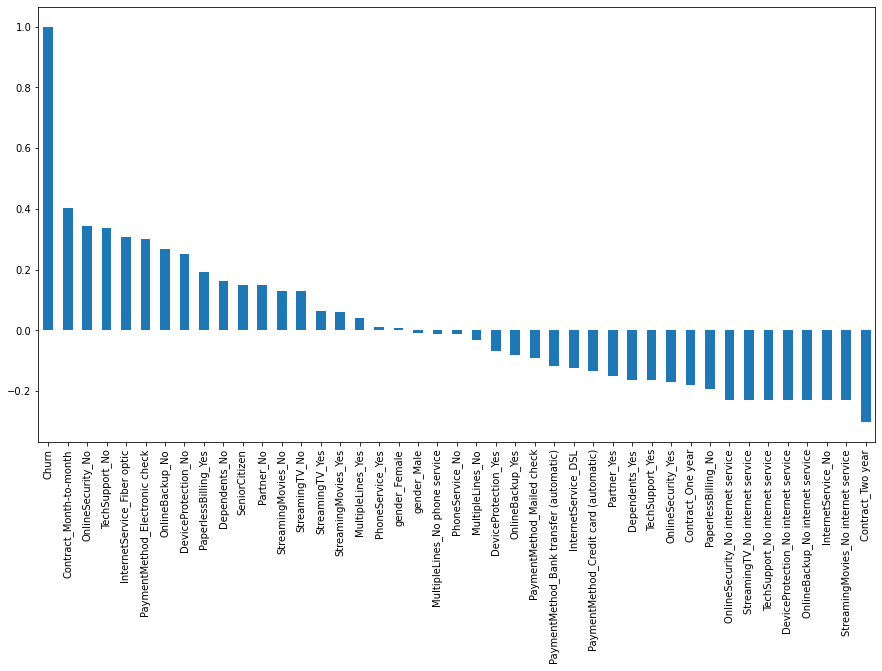

In [ ]:
plt.figure(figsize=(15,8))
cat_association['Churn'].sort_values(ascending = False).plot(kind='bar')

Insights:

1. Contract 2 yrs and 1 yrs are negatively correlated with churn while Month to month contract is positively correlated

2. Services like OnlineSecurity,StreamingTV,Techsupport,DeviceProtection,OnlineBackup and StreamingMovies withn No internet service is negatively correlated

3. Payments methods:
Other than electronic check other payment methods 
are negatively correlated

4. Presence of Partner, Dependents and TechSupport has negative correlation with churn

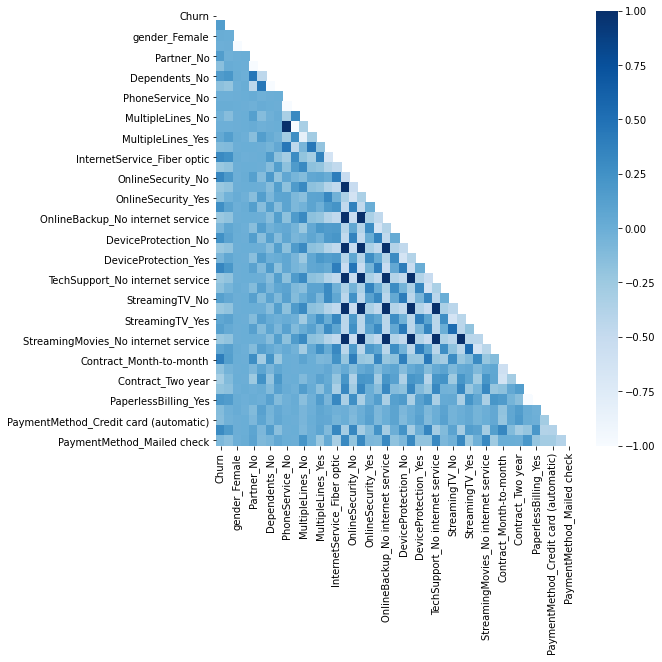

In [ ]:
plt.figure(figsize=(8,8))
matrix = np.triu(cat_association)
sns.heatmap(cat_association, cmap="Blues", mask= matrix)
plt.savefig("Categorical_associations-Churn")

#### Contigency table: Cat vs Cat(Churn)

In [ ]:
telco_cat.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

The analyse can be divided into 3 sections:

1. **Demographics** - Gender, Senior Citizen , Partner , Dependents
2. **Services Availed**- 

   a. PhoneService - Yes/ No
   
   If yes, MultipleLines - Yes/No

   b. InternetService - Yes/ No
   
   If yes, OnlineSecurity,OnlineBackup,    DeviceProtection,TechSupport,StreamingTV,StreamingMovies

3. **Payment methods**: Contract, PaperlessBilling,   PaymentMethod

In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['gender'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

gender,Female,Male,Total%
Churn,,,
0,36.2,37.2,73.4
1,13.4,13.2,26.6
Total%,49.5,50.5,100.0


Insights:

Gender ratio of the customers is equal 

The churn rate in both the genders are approx equal - 26% (M) and 27% (F) 

In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['SeniorCitizen'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

SeniorCitizen,0,1,Total%
Churn,,,
0,64.0,9.5,73.4
1,19.8,6.8,26.6
Total%,83.8,16.2,100.0


Insights:

Out of 16.2 of senior citizens,the churn rate is 42%
Whereas for customers who are not senior citizens, churn rate is 24%

We need to analyse why senior citizen are more likely to be churned

In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['Partner'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

Partner,No,Yes,Total%
Churn,,,
0,34.7,38.7,73.4
1,17.1,9.5,26.6
Total%,51.7,48.3,100.0


Insights:

Churn rate for customers who don't have parteners are high: 33%
Churn rate for customers with partners: 19.6%

Nearly the churn rate of with partners is twice as churn rate without parnter

In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['Dependents'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

Dependents,No,Yes,Total%
Churn,,,
0,48.2,25.2,73.4
1,21.9,4.6,26.6
Total%,70.2,29.8,100.0


Insights:

No Dependents: Churn rate = 31%

Yes Dependents : Churn rate = 15%

The churn rate for no dependents is twice as that of customers with dependents

In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['PhoneService'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

PhoneService,No,Yes,Total%
Churn,,,
0,7.3,66.2,73.4
1,2.4,24.2,26.6
Total%,9.7,90.3,100.0


Insights:

Churn rate for people with PhoneService: 27%

Churn rate for people without PhoneService: 25%

In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['MultipleLines'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

MultipleLines,No,No phone service,Yes,Total%
Churn,,,,
0,36.1,7.3,30.1,73.4
1,12.1,2.4,12.1,26.6
Total%,48.1,9.7,42.2,100.0


Insights:

Of the 90% of people having phone service,

Churn rate for people with MultipleLines: 29%

Churn rate for people No MultipleLines: 25%

We need to analyze why people with Multiple line have slight high churn rate

In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['InternetService'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

InternetService,DSL,Fiber optic,No,Total%
Churn,,,,
0,27.8,25.6,20.0,73.4
1,6.5,18.4,1.6,26.6
Total%,34.4,44.0,21.6,100.0


Insights:

The below are the churn rate respective to the different internet options
1. DSL - 19%
2. Fiber Optic - 42%
3. With No internet - 7%

Customers with Fiber optic connection are more likely to be churned as they have high churn rate as 42%



In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['OnlineSecurity'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

OnlineSecurity,No,No internet service,Yes,Total%
Churn,,,,
0,29.0,20.0,24.5,73.4
1,20.8,1.6,4.2,26.6
Total%,49.7,21.6,28.7,100.0


Insights:

The below are the churn rate for Online Security
1. Online Security - Yes - 14.6%
2. **Online Security - No - 41.8%**
3. With No internet - 7.4%

Customers with No Online Security options are more likely to be churned as they have high churn rate as 42%


In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['OnlineBackup'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

OnlineBackup,No,No internet service,Yes,Total%
Churn,,,,
0,26.4,20.0,27.0,73.4
1,17.5,1.6,7.4,26.6
Total%,43.9,21.6,34.5,100.0


Insights:

The below are the churn rate for Online Security
1. Online Backup - Yes - 21.44%
2. **Online Backup - No - 40%**
3. With No internet - 7.4%

Customers with No Online Backup options are more likely to be churned as they have high churn rate as 40%

In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['DeviceProtection'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

DeviceProtection,No,No internet service,Yes,Total%
Churn,,,,
0,26.8,20.0,26.6,73.4
1,17.2,1.6,7.8,26.6
Total%,44.0,21.6,34.4,100.0


Insights:

The below are the churn rate for Device protection
1. Device protection - Yes - 21.8%
2. **Device protection  - No - 39%**
3. With No internet - 7.4%

Customers with No Device protection options are more likely to be churned as they have high churn rate as 39%



In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['TechSupport'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

TechSupport,No,No internet service,Yes,Total%
Churn,,,,
0,28.8,20.0,24.6,73.4
1,20.6,1.6,4.4,26.6
Total%,49.4,21.6,29.0,100.0


Insights:

The below are the churn rate for Tech Support
1. Tech Support - Yes - 21.8%
2. **Tech Support  - No - 39%**
3. With No internet - 7.4%

Customers with No Device protection options are more likely to be churned as they have high churn rate as 39%

In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['StreamingTV'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

StreamingTV,No,No internet service,Yes,Total%
Churn,,,,
0,26.6,20.0,26.9,73.4
1,13.4,1.6,11.6,26.6
Total%,39.9,21.6,38.4,100.0


Insights:

Churn rate for - No StreamingTV : 33.5%

Churn rate for - StreamingMovies : 30.2%

Churn rate for - No internet Service : 7.4%

In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['StreamingMovies'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

StreamingMovies,No,No internet service,Yes,Total%
Churn,,,,
0,26.2,20.0,27.2,73.4
1,13.3,1.6,11.6,26.6
Total%,39.5,21.6,38.8,100.0


Insights:

Churn rate for - No StreamingMovies : 33.4%

Churn rate for - StreamingMovies : 29.8%

Churn rate for - No internet Service : 7.4%

In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['Contract'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

Contract,Month-to-month,One year,Two year,Total%
Churn,,,,
0,31.6,18.6,23.3,73.4
1,23.5,2.4,0.7,26.6
Total%,55.1,20.9,24.0,100.0


Insights:

Majority of the customers opt for Month to Month plan(More than 50%)
From that, chance of churn is pretty high - 43%

One year churn rate- 11.4%

Two year churn rate- 2.9%



In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['PaperlessBilling'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

PaperlessBilling,No,Yes,Total%
Churn,,,
0,34.1,39.4,73.4
1,6.7,19.9,26.6
Total%,40.7,59.3,100.0


Insights:

Out of 59% of the customers with Paperless Billing, 33% is the Churn rate

Out of 41% of the customers who don't opt Paperless Billing, 17% is the churn rate

In [ ]:
(pd.crosstab(telco_cat['Churn'],telco_cat['PaymentMethod'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Total%
Churn,,,,,
0,18.3,18.3,18.4,18.4,73.4
1,3.7,3.3,15.2,4.4,26.6
Total%,21.9,21.6,33.6,22.8,100.0


Insights:

Churn rate for Electronic Check payment is 45% 

Whereas for rest of the payment methods the churn rate is of 15 to 20%
(19.2%,15.2%, 16.8%)

**Overall Inference:**

1. Churn rate on both the **gender** is almost the same (26% (M) and 27% (F)). So gender is not influnetial factor 

2. Though the customer base of **Senior Citizen** is of only 16.2%, the churn rate is only 42%

3. Customers **without partners and Dependents** are more likely to churn - with churn rate 31% - 33% 

4. 10% of the customers have not opted for Phone services. Churn rate for with (27%) and without **PhoneService**(25%) has difference of 2%

5. Customers with **Multiples lines** are more likely to churn with Churn rate of 29%

6. 22% of the customers have not opted for **Internet services**
And among the rest of the 78%, Most of them have opted Fiber Optic and yet are not satisfied with it - 42% are tend to churn

7. **Contract**: The more lengther plan they choose , less likely are they to churn as Month to Month plan has 43% churn rate and 2 yrs plan has 2.9%

8. **Paperless Billing** has higher churn rate- So Billing might have been send using email or Credit card user

9. **Payment Method**-Customers using eChecks are more likely to be churned - 45% 
 


**Services Availed:**

Of all the services provided wrt Internet - 21.6% of customers don't have internet

Of all the services done, customers who haven't opted the services have churned max.

1. **OnlineSecurity** : 42% churn rate for customers without Online security

2. **Online Backup** : 40% churn rate for customers without Online Backup

3. Device protection:

4. Tech Support:

5. Streaming Movies:

6. Streaming TV:



#### Barplots - Cat vs Cat(Churn)

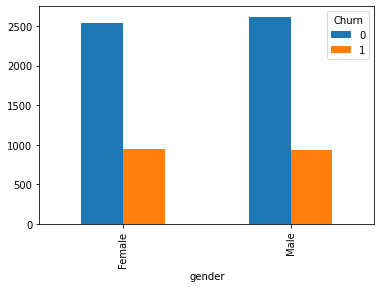

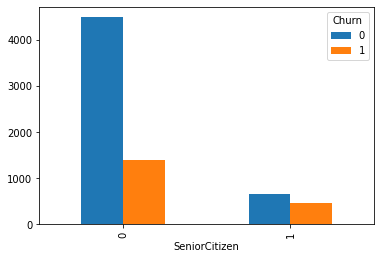

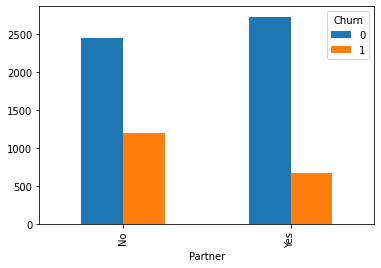

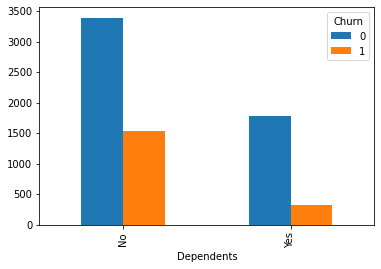

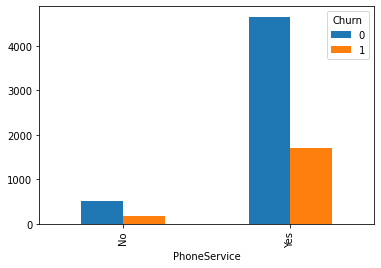

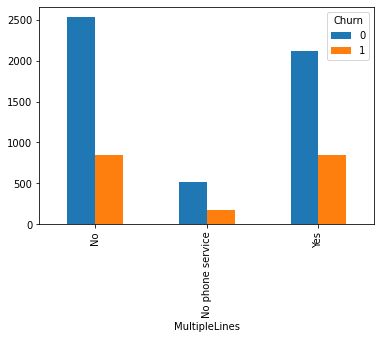

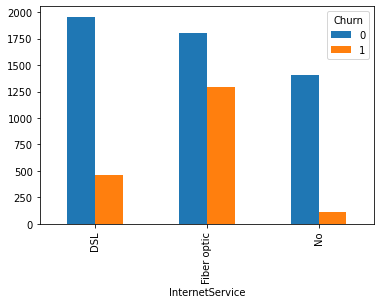

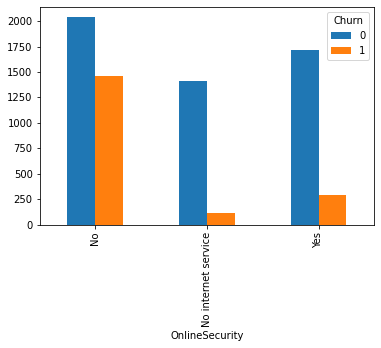

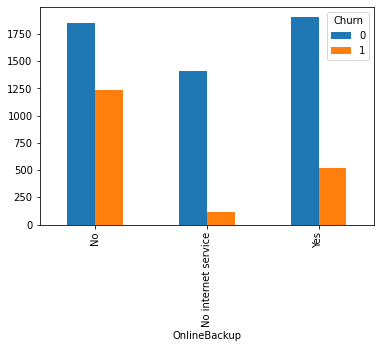

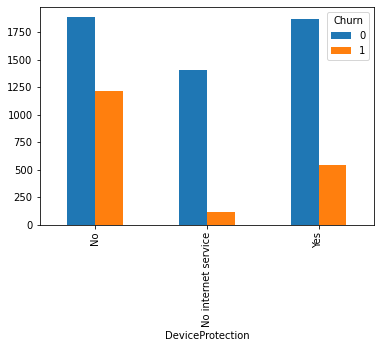

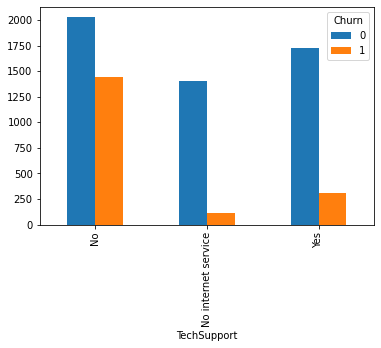

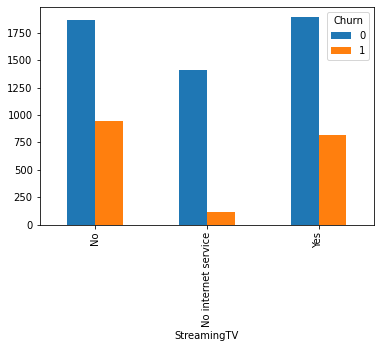

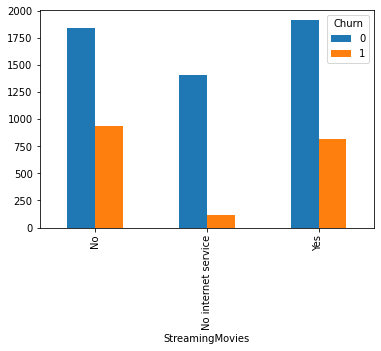

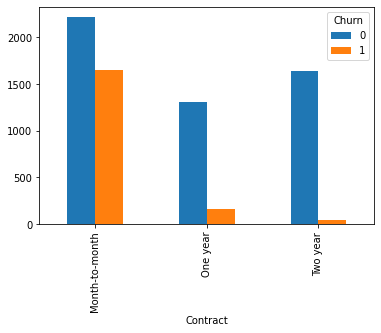

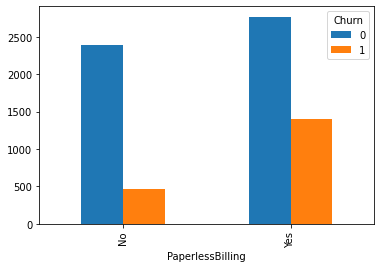

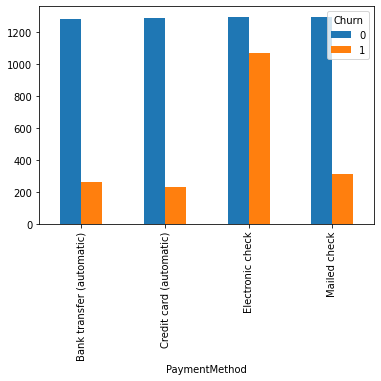

In [ ]:
x_cat = telco_cat.drop(['Churn'],axis =1)
for i in x_cat:
  pd.crosstab(x_cat[i], telco_cat['Churn']).plot.bar()
  plt.show()
  print("\n\n\n")

#### Boxplots - Numerical vs Cat (Churn)

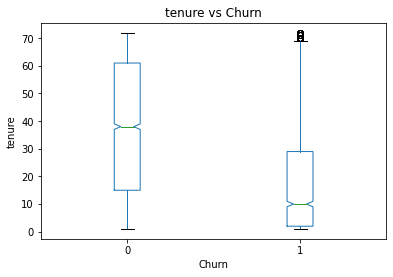

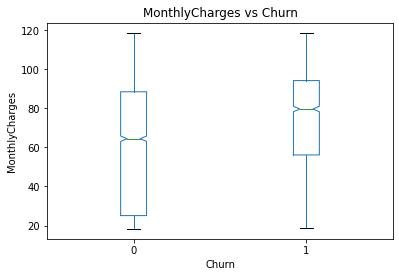

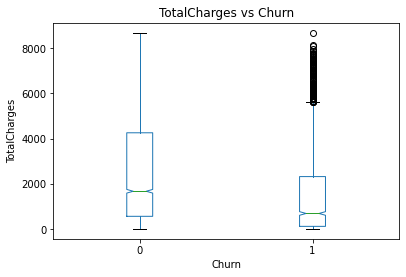

In [ ]:
x_num = telco_num.drop(['Churn'], axis=1)

for i in x_num:
  telco_num.boxplot(column= i, by="Churn", notch = True, grid=False, vert = True )
  plt.suptitle('')
  plt.title('%s vs Churn'%i)
  plt.ylabel("%s"%i)
  plt.show()
  print("\n\n\n")

**Insights:**

1. The lesser the **tenure** the more likely to churn

2. **MonthlyCharges** are slightly left skewed, customers who have churned have paid more compartively.

3. The lesser the **totalcharges** more is the churn rate

### Data Preparation

#### Outlier Analysis

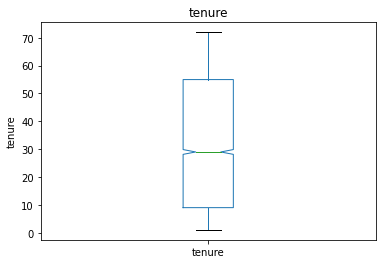

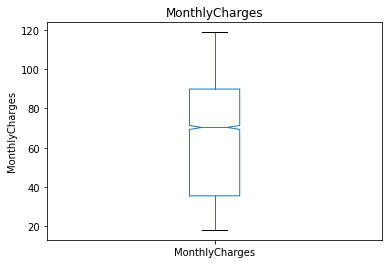

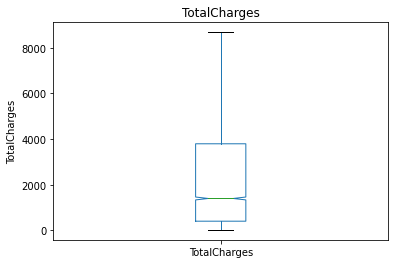

In [ ]:
x_num = telco_num.drop(['Churn'], axis=1)

for i in x_num:
  telco_num.boxplot(column= i,notch = True, grid=False, vert = True )
  plt.suptitle('')
  plt.title('%s'%i)
  plt.ylabel("%s"%i)
  plt.show()
  print("\n\n\n")

**Inference**: 

There is no outlier in all the numerical variables


#### Encoding Categorical variables

In [ ]:
telco1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [ ]:
#For the columns with "Yes/No" - Convert then to binary form using map function

# List of variables to map
varlist =  ['PhoneService', 'PaperlessBilling','Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telco1[varlist] = telco1[varlist].apply(binary_map)


In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
# If a categorical columns has 3 subsections, we will retain 2 and drop oneof them as 00 implies it belong to 3rd category
encoding1 = pd.get_dummies(telco1[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding encoded categorical variables to source dataframe
telco1 = pd.concat([telco1, encoding1], axis=1)

In [ ]:
# For all the services availed, we have a column "No internet services" which is already captured by Internet Service 
#So while encding we can drop that column which gives redudant information

# Creating dummy variables for the variable 'MultipleLines'.
ml= pd.get_dummies(telco1['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telco1 = pd.concat([telco1,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telco1['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telco1 = pd.concat([telco1,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telco1['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telco1 = pd.concat([telco1,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telco1['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telco1 = pd.concat([telco1,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telco1['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telco1 = pd.concat([telco1,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telco1['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telco1 = pd.concat([telco1,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telco1['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telco1 = pd.concat([telco1,sm1], axis=1)

In [ ]:
telco1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


#### Missing values Treatment

In [ ]:
telco1.isnull().sum()

customerID                               0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

**Inference** : 
There is no missing values in the dataset

### Model Building

In [ ]:
#Predictor variables
X = telco1.drop(['Churn','customerID'],axis=1)

In [ ]:
#Target variables
Y= telco1['Churn']

#### Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Train- Test spliting

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,stratify=Y,random_state=100)

In [ ]:
#Performing SMOTE as it is an unbalanced dataset
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, Y_train_res = sm.fit_sample(X_train, Y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res == 0))) 


Before OverSampling, counts of label '1': 1121
Before OverSampling, counts of label '0': 3098 

After OverSampling, the shape of train_X: (6196, 30)
After OverSampling, the shape of train_y: (6196,) 

After OverSampling, counts of label '1': 3098
After OverSampling, counts of label '0': 3098


Metrics - Function

In [ ]:
from sklearn import metrics

def classification_metrics(y_test,y_pred):
  #Confusion Matrix
  print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))
  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  # Model Precision
  print("Precision:",metrics.precision_score(y_test, y_pred))
  # Model Recall
  print("Recall:",metrics.recall_score(y_test, y_pred))
  #F1 score
  print("F1 Score:",metrics.f1_score(y_test, y_pred))
  



#### Decision Tree Classifier

Using Gini:

In [ ]:
 # Creating the classifier object 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
 from sklearn.metrics import classification_report
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5) 
# Performing training 
clf_gini.fit(X_train_res, Y_train_res) 
y_pred = clf_gini.predict(X_test)  

In [ ]:
classification_metrics(Y_test,y_pred)

Confusion Matrix: [[1716  349]
 [ 305  443]]
Accuracy: 0.7675079985780305
Precision: 0.5593434343434344
Recall: 0.5922459893048129
F1 Score: 0.5753246753246755


Using Entropy:

In [ ]:
# Creating the classifier object 
clf_en = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=5, min_samples_leaf=5) 
# Performing training 
clf_en.fit(X_train_res, Y_train_res) 
y_pred = clf_en.predict(X_test)  

In [ ]:
classification_metrics(Y_test,y_pred)

Confusion Matrix: [[1314  235]
 [ 256  305]]
Accuracy: 0.7672985781990521
Precision: 0.5648148148148148
Recall: 0.5436720142602496
F1 Score: 0.5540417801998184


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
#Train the model using the training sets
train_lr = lr.fit(X_train_res,Y_train_res)
#Predict the response for test dataset
predict_lr= lr.predict(X_test)


In [ ]:
classification_metrics(Y_test,predict_lr)

Confusion Matrix: [[1565  500]
 [ 175  573]]
Accuracy: 0.7600426590828298
Precision: 0.5340167753960857
Recall: 0.766042780748663
F1 Score: 0.629324546952224


#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(max_depth=12,n_estimators=1000)

#Train the model using the training sets
rf.fit(X=X_train_res,y=Y_train_res)
#Predict the response for test dataset
predict_Ytest=rf.predict(X_test)

In [ ]:
classification_metrics(Y_test,predict_Ytest)

Confusion Matrix: [[1819  246]
 [ 312  436]]
Accuracy: 0.8016352648418059
Precision: 0.6392961876832844
Recall: 0.5828877005347594
F1 Score: 0.6097902097902098
